# Analyse baseline model 

In this document we will create a baseline model that is the simplest solution for us.
This baseline model was created with a CNN network. The structure of the model can be found in [this](https://github.com/BB8-2020/EmpathicRobot/blob/baseline-model/baseline-model/baseline_model.py) file. 

In [1]:
# import the model python code 
import baseline_model as ml
import matplotlib.pyplot as plt

Lets us start with creating the model:

In [2]:
baseline_model = ml.create_model()

The model summary looks as here below:

### Build model 
__1. Conv Layer__

The first layer consists of 32 3x3 filters with ReLU. We set the input of this layer equal to the shape of the train data, which is (48, 48, 1).

We leave the stride and padding at the default value. In the next model we are going to play with this but for now we keep it at 1 and "vaild".

We do add a Batch normalization. The output of this layer (the activation map) is (46, 46, 32).

__2. Conv Layer__

The second layer consists of 64 filters of 3x3 and here we apply batch normalization. The output of this layer woudld be (44, 44, 64) 

__3. Conv Layer__

The last conv layer consists of 128 filters of 3x3 and we also apply a max pooling of (2,2) that produce output shape of (21, 21, 128). We also add a batch normalization to this layer. 

To this layer we add a flatten option, that means the output shape of this layer would be (56448) 

__4. fully connected layer__

This layer takes (56448) as input. The output shape of this layer is the probability of 2 classes. 

In [3]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 32)        128       
_________________________________________________________________
conv2 (Conv2D)               (None, 44, 44, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 6

Looks good, time to compile!

## Model compile and train

To compile the model we use Adam optimaizer and categorical_crossentropy as los function. Let us now train the model. We start by reading the correct json dataset.

In [4]:
# parameter is the correct path to the json file.
train_frame = ml.read_data("../../test_data_lead/ferPlus_final_data_json/train_happy_frame.json")

Now we create the trainsets and use these to train our model.

In [5]:
# the trainsets are created when calling the train function.
history = ml.train_model(model= baseline_model, frame= train_frame, batch_size= 64, epochs= 10, vs= 0.2)

Epoch 1/10
353/353 [==============================] - 6s 12ms/step - loss: 1.5168 - accuracy: 0.4296 - val_loss: 3.7577 - val_accuracy: 0.5810
Epoch 2/10
353/353 [==============================] - 4s 10ms/step - loss: 1.8715 - accuracy: 0.4294 - val_loss: 1.1048 - val_accuracy: 0.3516
Epoch 3/10
353/353 [==============================] - 4s 10ms/step - loss: 1.3263 - accuracy: 0.4080 - val_loss: 1.5580 - val_accuracy: 0.4266
Epoch 4/10
353/353 [==============================] - 4s 10ms/step - loss: 1.3485 - accuracy: 0.3955 - val_loss: 2.7683 - val_accuracy: 0.3449
Epoch 5/10
353/353 [==============================] - 4s 11ms/step - loss: 1.9475 - accuracy: 0.4198 - val_loss: 0.9944 - val_accuracy: 0.4478
Epoch 6/10
353/353 [==============================] - 4s 11ms/step - loss: 1.2350 - accuracy: 0.5808 - val_loss: 1.0695 - val_accuracy: 0.5339
Epoch 7/10
353/353 [==============================] - 4s 11ms/step - loss: 1.1884 - accuracy: 0.5499 - val_loss: 1.2095 - val_accuracy: 0.5185

In [6]:
# hier beschrijf je het resultaat van het model, teken hierbij een mooi plot van de acc en loss fucntie 

Now we're going to test our model using the testfile for the baseline model.

In [7]:
test_frame = ml.read_data("../../test_data_lead/ferPlus_final_data_json/test_happy_frame.json")

In [8]:
loss, accuracy = ml.evaluate_model(model = baseline_model, frame= test_frame, batch_size=256)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

28/28 [==============================] - 1s 13ms/step - loss: 0.9994 - accuracy: 0.4193
Test loss: 0.9994
Test accuracy: 0.4193


## Results

In [9]:
#Deze functie mag je ergens anders platsen + docuemteren 
def plot_results(history):
    """Plot the results of the fit function of the model.
       takes history: A nummpy array as input."""
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

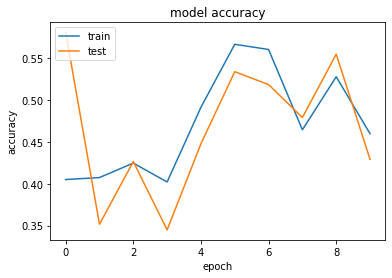

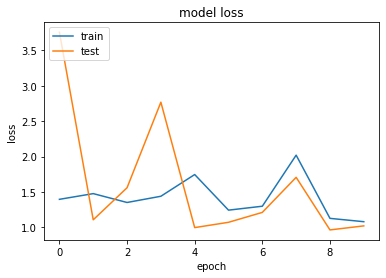

In [10]:
plot_results(history)

## Conclusion 

In [11]:
# hier zeg we wat de resultaten van het model betekennen en waarvoor we deze resultaten precies gaan gebruiken. 